In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(f"X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"X_test: {X_test.shape} | y_test: {y_test.shape}")

X_train: (60000, 28, 28) | y_train: (60000,)
X_test: (10000, 28, 28) | y_test: (10000,)


In [4]:
X_train, X_test = X_train /255.0, X_test /255.0

In [5]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 2.3151 - accuracy: 0.1106 - val_loss: 2.2649 - val_accuracy: 0.1404
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 2.2234 - accuracy: 0.1685 - val_loss: 2.1855 - val_accuracy: 0.1928
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 2.1536 - accuracy: 0.2246 - val_loss: 2.1190 - val_accuracy: 0.2554
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 2.0911 - accuracy: 0.2870 - val_loss: 2.0563 - val_accuracy: 0.3183
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 2.0299 - accuracy: 0.3482 - val_loss: 1.9930 - val_accuracy: 0.3782
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 1.9664 - accuracy: 0.4087 - val_loss: 1.9260 - val_accuracy: 0.4392
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 1.8981 - accuracy: 0.4683 - val_loss: 1.8542 - val_accurac

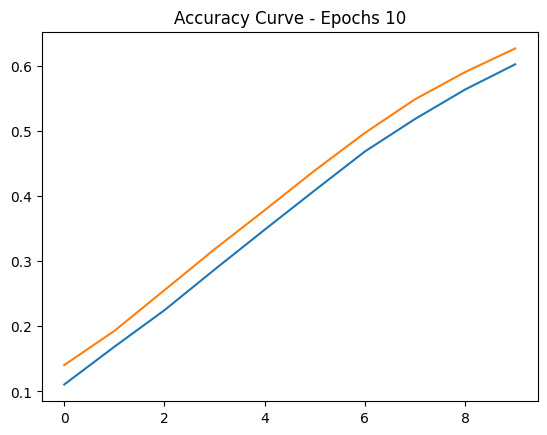

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Curve - Epochs 10')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7588\2731077063.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


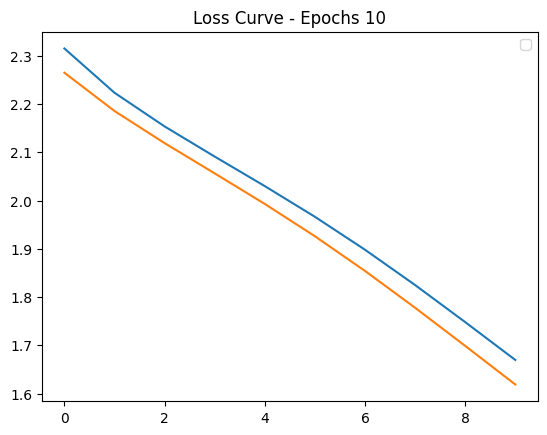

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Curve - Epochs 10')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

print(classification_report(y_true, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       980
           1       0.72      0.93      0.81      1135
           2       0.93      0.14      0.25      1032
           3       0.82      0.61      0.70      1010
           4       0.55      0.66      0.60       982
           5       0.70      0.20      0.32       892
           6       0.60      0.87      0.71       958
           7       0.83      0.56      0.67      1028
           8       0.45      0.75      0.56       974
           9       0.55      0.55      0.55      1009

    accuracy                           0.63     10000
   macro avg       0.68      0.62      0.59     10000
weighted avg       0.68      0.63      0.60     10000



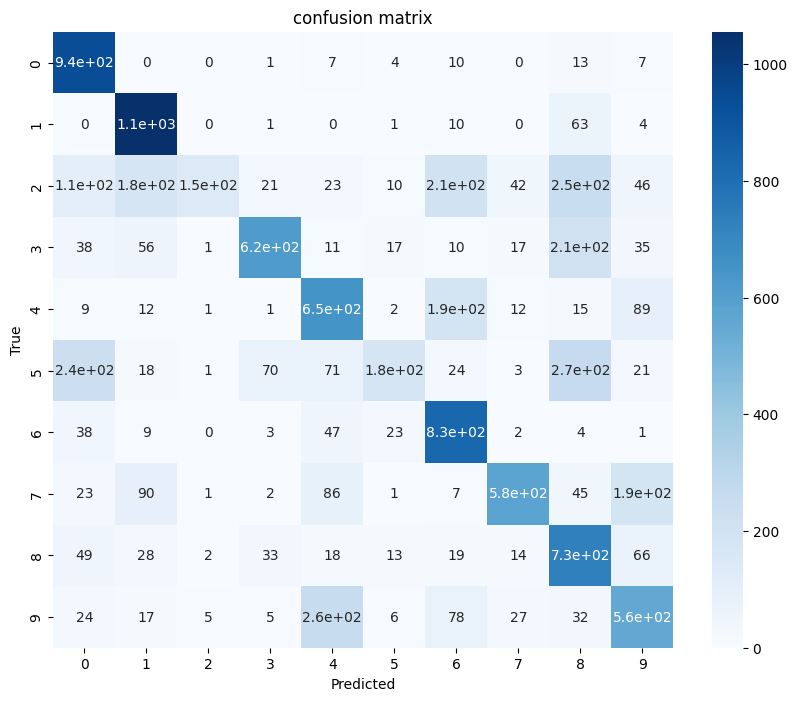

In [21]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
plt.title("confusion matrix")
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [22]:
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for i, acc in enumerate(per_class_accuracy):
    print(f"Accuracy for class {i}: {acc:.2f}")

Accuracy for class 0: 0.96
Accuracy for class 1: 0.93
Accuracy for class 2: 0.14
Accuracy for class 3: 0.61
Accuracy for class 4: 0.66
Accuracy for class 5: 0.20
Accuracy for class 6: 0.87
Accuracy for class 7: 0.56
Accuracy for class 8: 0.75
Accuracy for class 9: 0.55


In [24]:
from sklearn.preprocessing import label_binarize

y_true_bin = label_binarize(y_true, classes=range(10))

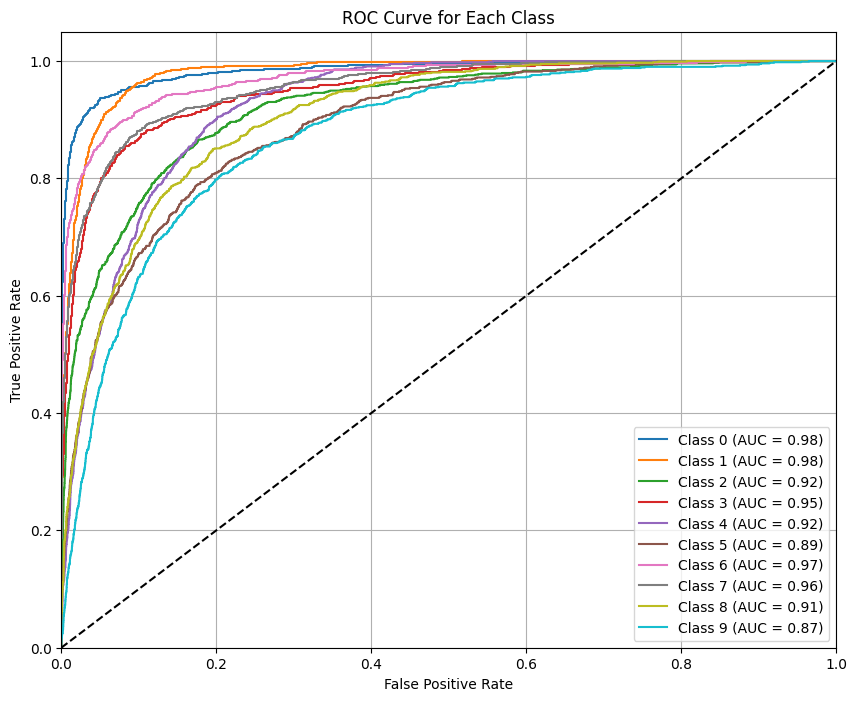

In [25]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [28]:
# !pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [45]:
import cv2

def make_prediction(model, img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = img /255.0
    img = cv2.resize(img, (28, 28))
    img = img.reshape(1, 28, 28, 1)
    y_pred = model.predict(img)
    print(f"y_pred: {y_pred}")
    y_pred_class = np.argmax(y_pred, axis=1)
    return y_pred_class

1/1 [==============================] - 0s 23ms/step
y_pred: [[0.15607212 0.08770113 0.09854858 0.12311122 0.07981704 0.09935268
  0.05378994 0.08332951 0.11381534 0.10446238]]
Prediction: [0]


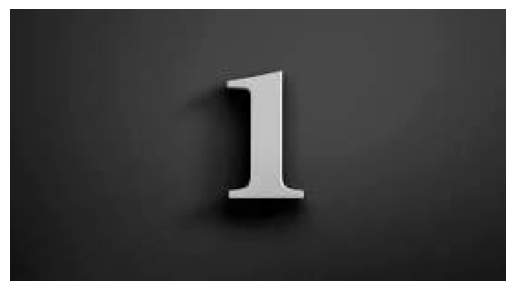

In [46]:
img_path = r"C:\Users\LENOVO\Downloads\digit-1.jpeg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print(f"Prediction: {make_prediction(model, img_path)}")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()